In [1]:
from datetime import date
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_DIR = '/home/ubuntu/data/'
COVID_DATA_DIR = f'{DATA_DIR}/covid'
ECON_DATA_DIR = f'{DATA_DIR}/patterns'

### % of population with Covid-like symptoms in each location daily

In [6]:
covidlike_pct = pd.read_csv(f'{COVID_DATA_DIR}/covidlike_pct.csv')

In [7]:
covidlike_pct.head()

,geo_value,time_value,issue,lag,covidlike_pct,stderr,sample_size
0,AK,2021-03-01,2021-03-17,16,0.724784,0.356963,861.0000
1,AL,2021-03-01,2021-03-17,16,1.138372,0.173658,3902.1086
2,AR,2021-03-01,2021-03-17,16,0.821564,0.177104,2677.1034
3,AZ,2021-03-01,2021-03-17,16,0.911744,0.140218,5322.3944
4,CA,2021-03-01,2021-03-17,16,0.803879,0.085038,23757.1667


In [47]:
states_count = covidlike_pct.geo_value.nunique()

#### Daily ranges

In [84]:
covidlike_pct_daily_ranges = pd.DataFrame(columns=['min', 'median', 'mean', 'max'])

In [85]:
covidlike_pct_daily_ranges['min'] = covidlike_pct.groupby('time_value').covidlike_pct.min()
covidlike_pct_daily_ranges['median'] = covidlike_pct.groupby('time_value').covidlike_pct.median()
covidlike_pct_daily_ranges['mean'] = covidlike_pct.groupby('time_value').covidlike_pct.mean()
covidlike_pct_daily_ranges['max'] = covidlike_pct.groupby('time_value').covidlike_pct.max()

[]

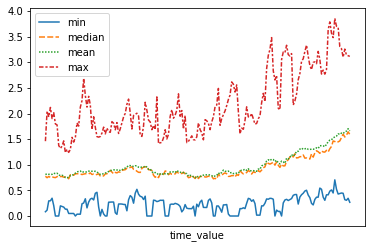

In [86]:
ax = sns.lineplot(data=covidlike_pct_daily_ranges)
ax.set_xticks([])

#### Patterns by state

In [36]:
covidlike_pct_state_means = covidlike_pct.groupby('geo_value').covidlike_pct.mean().sort_values()

In [79]:
states = [covidlike_pct_state_means.index[0], covidlike_pct_state_means.index[int(states_count/4)],
          covidlike_pct_state_means.index[int(states_count/2)], covidlike_pct_state_means.index[int(states_count*0.75)],
          covidlike_pct_state_means.index[-1]]
covidlike_pct_state_dailies = pd.DataFrame(columns=states)
for s in states:
    covidlike_pct_state_dailies[s] = covidlike_pct.loc[covidlike_pct.geo_value == s].reset_index().covidlike_pct

<AxesSubplot:>

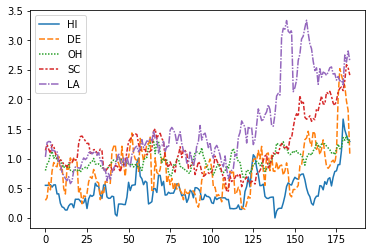

In [83]:
sns.lineplot(data=covidlike_pct_state_dailies)

### Number of new confirmed COVID-19 cases per 100,000 population, daily

In [87]:
cases_per_100k = pd.read_csv(f'{COVID_DATA_DIR}/cases_per_100k.csv')

In [90]:
cases_per_100k.shape

(9568, 5)

In [88]:
cases_per_100k.head()

,geo_value,time_value,issue,lag,cases_per_100k
0,AK,2021-03-01,2021-09-17,200,17.028539
1,AL,2021-03-01,2021-03-11,10,18.445736
2,AR,2021-03-01,2021-03-11,10,32.246722
3,AZ,2021-03-01,2021-03-11,10,19.338180
4,CA,2021-03-01,2021-09-17,200,8.701467


In [89]:
cases_per_100k.describe()

,lag,cases_per_100k
count,9568.000000,9568.000000
mean,13.834239,16.043639
std,36.357908,16.536474
min,1.000000,-19.254748
25%,3.000000,5.731109
50%,3.000000,11.583911
75%,4.000000,20.164474
max,200.000000,145.883091


In [91]:
(cases_per_100k.cases_per_100k < 0).sum()

34

### Estimated percentage of people who wore a mask most or all the time in public in the past 7 days

In [ ]:
f'{DATA_DIR}/mask_pct.csv'

### Estimated percentage of respondents who have already received a vaccine for COVID-19

In [ ]:
f'{DATA_DIR}/vaxxed_pct.csv'